# Исследование по выявлению определяющих успешность игры закономерностей.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель исследования: 
- Определить потенциально популярный продукт и спланировать рекламные кампании

План исследования: 
- Подготовка данных
- Проведение исследования
- Обработка результатов исследования
- Проверка гипотезы
- Формулирование выводов

### Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
#Импортируем бмблмотеки

In [2]:
data = pd.read_csv('/datasets/games.csv')
pd.set_option('display.max_columns', None)
display(data.head())
print(data.head())
#Открываем файл с данными и изучаем общую информацию

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В исследуемых данных 11 столбцов и 16715 записей.\
В 6 столбцах присутсвуют пропуски. Попробую разобраться что это за пропуски и как их можно заполнить. А также проверю типы данных в этих колонках и по какой причине их нужно заменить.

Пропущенные значения в столбцах:

name -  2 пропуска.\
Минимальное количество пропусков, возможно из-за ошибки при заполнении.

genre - 2 пропуска.\
Минимальное количество пропусков, возможно из-за ошибки при заполнении.

year_of_release - 269 пропусков. Их можно удалить, так как пропусков не существенное количество.\
Пропуски связаны с тем, что не указана дата релиза, возможно игра слишком старая.\
Необходимо перевести тип данных к целочисленному, так как год не может относится к вещественным.

critic_score - 8578 пропуска. Оставляем пропуски, заполнение  может исказить итоговые результаты корреляционного анализа и стат-тестов.

user_score - 6701 пропуск. Оставляем пропуски, заполнение  может исказить итоговые результаты корреляционного анализа и стат-тестов.\
Пропуски, связаны с тем, что игра еще не добралась до пользователей.\
В столбце с оценкой пользователей, присутствует значение 'tbd' - оценка еще не определена. То есть, данные отсутствуют. Значит их можно изменить на NaN. После этого, необходимо перевести тип данных к вещественному.

rating - 6766 пропусков. Пустые значения скорее всего связаны с тем, что до определенного года, данный ретинг не существовал.\
Пропуски заполним значением "не определен", потому что это категориальная переменная.

### Предобработка данных

In [6]:
data.columns = data.columns.str.lower()
#Приводим название столбцов к нижнему регистру

In [7]:
data.dropna(subset=['year_of_release'], inplace = True)
#Удаляем пропуски в 'year_of_release'

In [8]:
data['year_of_release'] = data['year_of_release'].round(0).astype('int')
#Изменяем тип данных с вещественного на целочисленное

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#Замена 'tbd' на NaN
data['user_score'] = data['user_score'].astype('float64')
#Изменяем тип данных на вещественное

In [10]:
data['rating'] = data['rating'].fillna('не определен')
#заполняем пропуски значением "не определен"

In [11]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#Подсчет суммарных продаж во всех регионах и записываем их в отдельный столбец
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [12]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

In [13]:
data.dropna(subset=['name', 'genre'], inplace = True)
#Удаляем пропуски в 'name' и 'genre'

### Исследовательский анализ данных

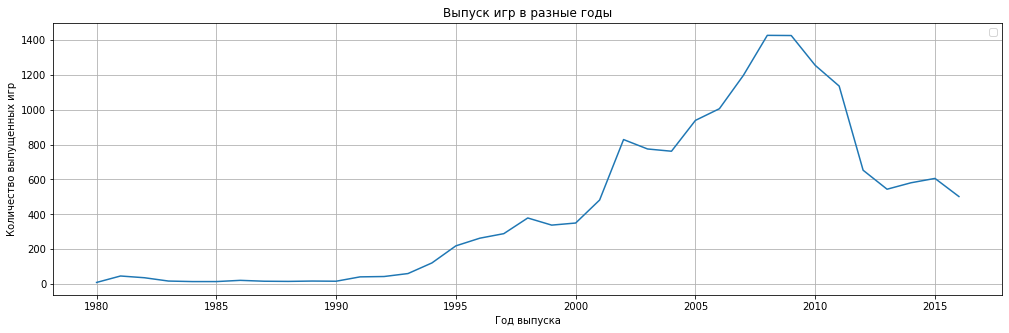

In [14]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .plot(grid = True, figsize=(17,5))

#Создаем сводную таблицу по столбцу 'year_of_release', значения - количество 'name'.
#Строим график 17x5 для большей наглядности

plt.title('Выпуск игр в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.legend('');

С 2000-го года начинается активный рост выпуска компьютерных игр.\
На период 2006-2011гг. приходится максимальное количество выпущенных игр. Связано это с развитием цифровых технологий, доступностью персональных компьютеров и приставок, а так же спросом на появление соответствующего контента.\
Пик приходится на 2009г. После этого идет резкое снижение до 2013г.\
Период с 1980г. по 1994г. является стабильным и в тоже время наименьшим по производительности. Не является важным, так как имеет небольшие значения, по сравнению с остальной выборкой.

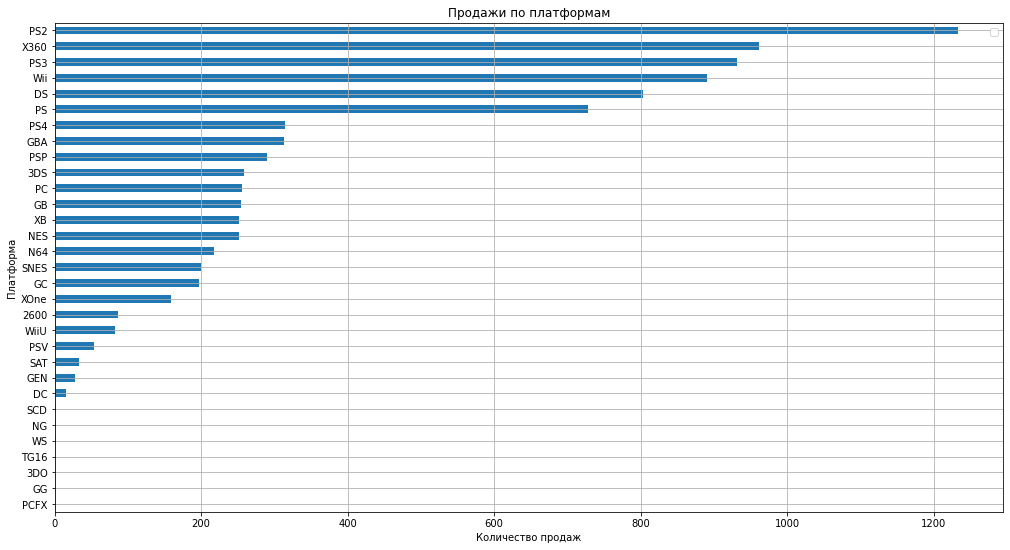

In [15]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales')\
    .plot(kind="barh", grid = True, figsize=(17,9))

plt.title('Продажи по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.legend('');

5 игровых платформ с наибольшим количеством продаж:\
PS2 - более 1200\
X360, PS3, Wii, DS - от 800 до 1000 продаж.

In [16]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()
#Присваеваем переменной 5 самый продаваемых устройств.

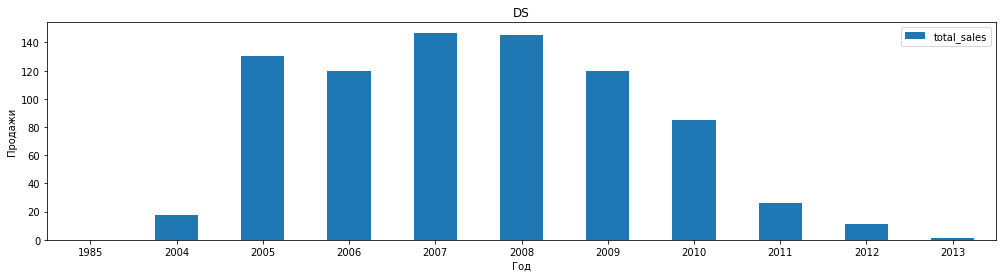

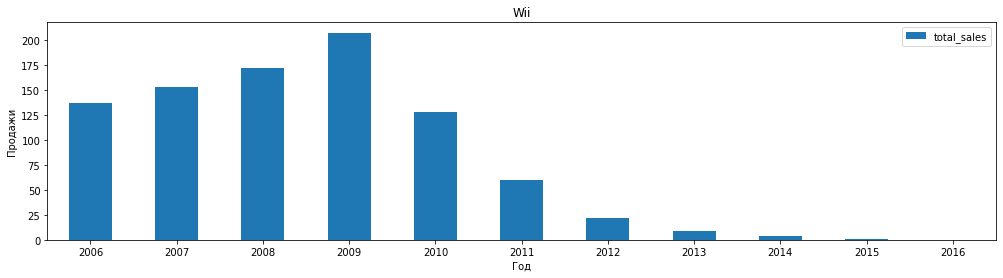

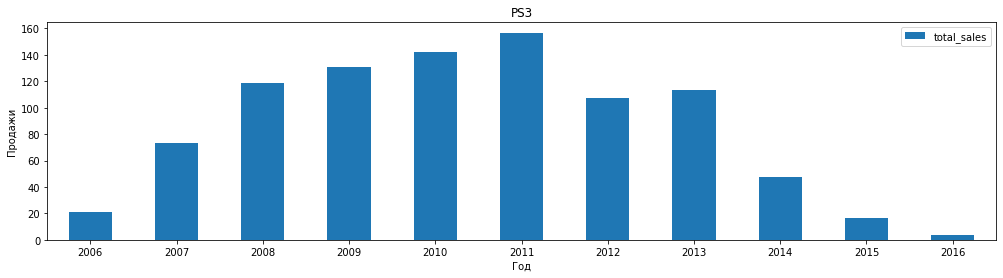

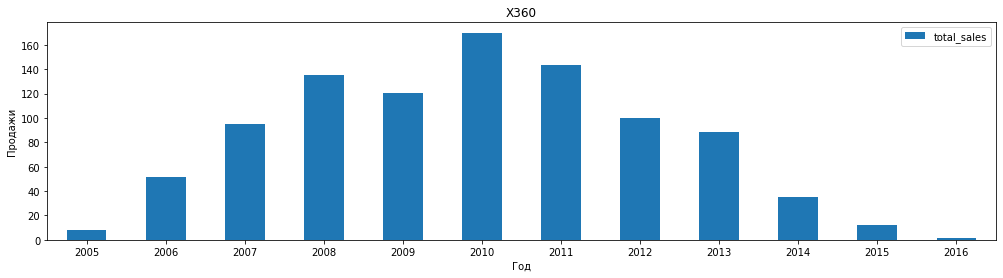

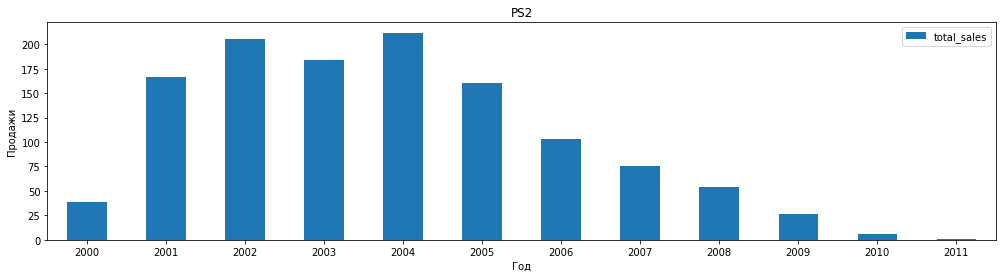

In [17]:
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(17, 4), rot=0)
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    
#С помощью цикла строим вертикальные гистограммы для 5 самых продаваемых игровых платформ

В среднем, активное использование игровых платформ 6-9 лет. Наибольшее число продаж выпадает на 2006-2010гг.\
Снижение продаж всех игровых платформ, в основном, происходит из-за устаревания платформы и выхода новых поколений.\
PS2 - лидер по продажам. Наибольшие значения приходятся на 2001-2005гг. Культовая игровая приставка, которая начала терять свои позиции, в связи с выходом нового покаления PS3 в 2006г и перестала асболютно быть интересной уже к 2011г. В свою очередь, 3 поколение игровой платформы было дольше времени популярно, но по количеству продаж не смогло обойти 2 поколение.\
Х360 - главный конкурент PS. Начало продаж платформы произошло в 2005г. и достигло своих пиков к 2010г., стремительное падение началось с 2013г.\
Замыкает список: Wii начало высоких продаж с появлением в 2006г. и постепенным снижением с 2010г.\
А так же DS с началом популярности в 2005 и снижения интереса у пользователей в 2009г.\
При построении графика обнаружена ошибка у платформы DS, в 1985г. приставки не существовало на рынке.

In [18]:
curr_period = data[data['year_of_release'] >= 2013]
#Выбираем актуальный период
#2013 год считаю актуальным, по причине того, что рост продаж имеется только у актуальных игрофых платформ.

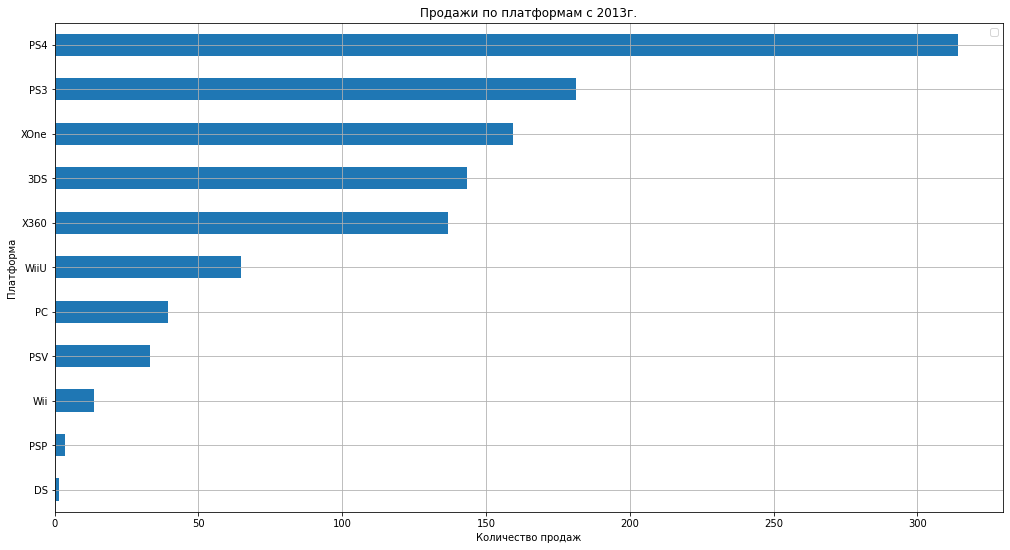

In [19]:
curr_period.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales')\
    .plot(kind="barh", grid = True, figsize=(17,9))

plt.title('Продажи по платформам с 2013г.')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.legend('');

С 2013г. самыми продаваемыми плотформами являются: лидер рынка PS4 и PS3.\
Следом, примерно с одинаковыми значениями конкуренты из Microsoft XOne и X360, а так же Nintendo 3DS.

In [20]:
curr_period.groupby('platform')['total_sales'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24


In [21]:
top_platform_uniq = ['PS4','XOne','3DS','PC','WiiU']
#Выбираем 5 уникальных игровых платформ (потенциально прибыльные платформы)

top_platform = curr_period[curr_period['platform'].isin(['PS4','XOne','3DS','PC','WiiU'])]
#Создаем выборку из необходимых платформ

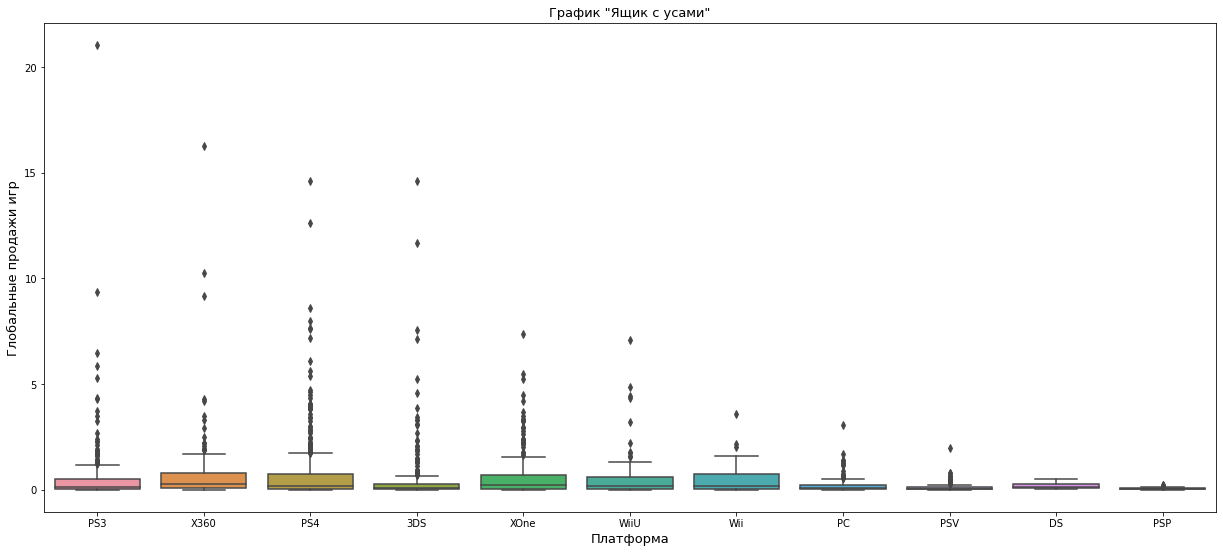

In [22]:
#диаграмма размаха по всем платформам за актуальный период
plt.figure(figsize=(21,9))
sns.boxplot(data=curr_period, x='platform', y='total_sales')
plt.title('График "Ящик с усами"', fontsize=13)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Глобальные продажи игр',fontsize=13);

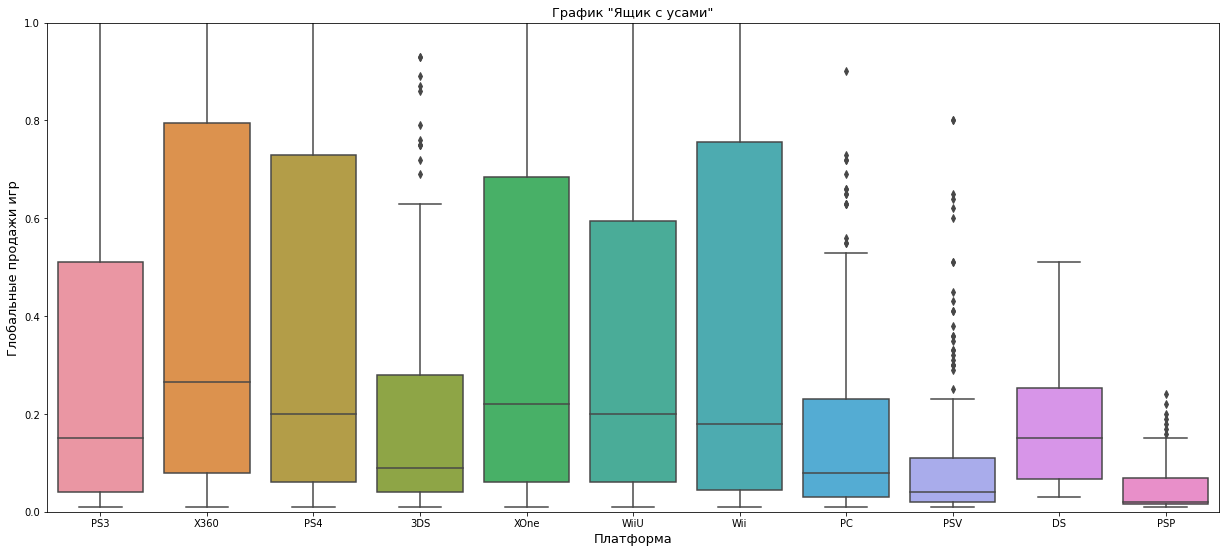

In [23]:
#диаграмма размаха по всем платформам за актуальный период(увеличенная)
plt.figure(figsize=(21,9))
sns.boxplot(data=curr_period, x='platform', y='total_sales')
plt.title('График "Ящик с усами"', fontsize=13)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Глобальные продажи игр',fontsize=13)
plt.ylim([0, 1]);

Рассмотрев диаграмму размаха по всем платформам за актуальный период, можно увидеть, что медина у всех большинства платформ варьируется в диапазоне 0.1-0.3.\
Наибольшее медианное значение у X360, XOne, PS4 и WiiU. Среднее у 3DS и PC. Такое различие возможно из-за того, что последние две платформы меньше всего предназначены для комфортного гейминга. Кроме того, на показатели PC может влиять низкая стоимость игр в период распродаж в онлайн-сервисах цифрового распространения компьютерных игр (Steam), а так же наличие торрент трекеров, что уменьшает количество глобальных продаж игр у PC.\
Такие платформы как PSV и PSP имеют около нулевые значения, так как не являются восстребованными в рассматриваемом актуальном периоде.

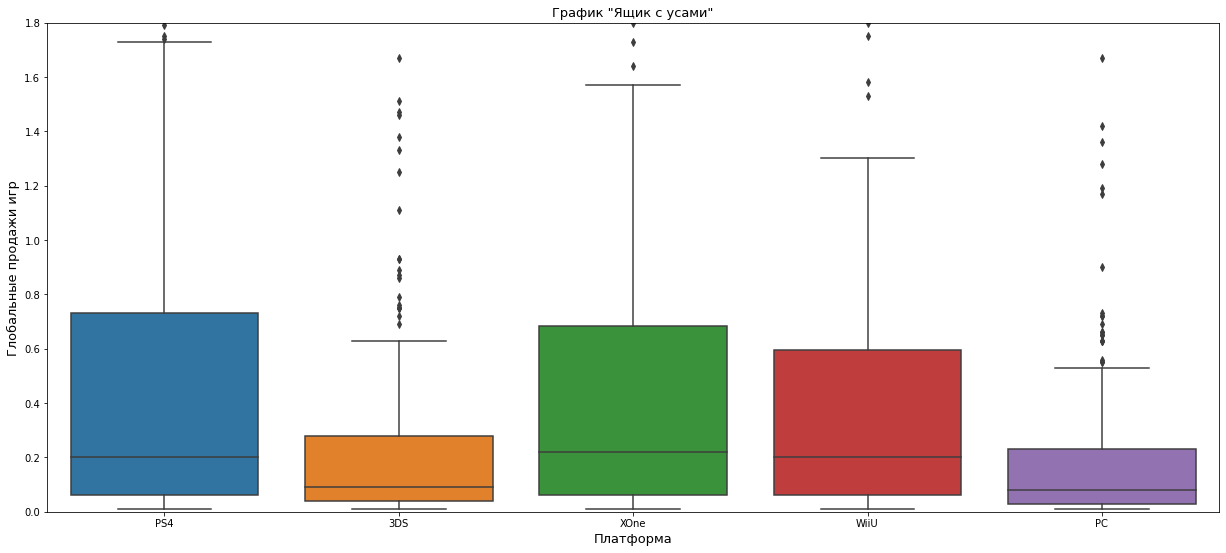

In [24]:
plt.figure(figsize=(21,9))
sns.boxplot(data=top_platform, x='platform', y='total_sales')
plt.title('График "Ящик с усами"', fontsize=13)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Глобальные продажи игр',fontsize=13)
plt.ylim([0, 1.8]);

По ТОП-платформам:

Медина у всех платформ приблизительно в одном диапазоне - около 0.1-0.3.\
Наибольшее значение у PS4, XOne и WiiU. Наименьшее у 3DS и PC. Такое различие возможно из-за того, что последние две платформы меньше всего предназначены для комфортного гейминга. Кроме того, на показатели PC может влиять низкая стоимость игр в период распродаж в онлайн-сервисах цифрового распространения компьютерных игр (Steam), а так же наличие торрент трекеров, что уменьшает количество глобальных продаж игр у PC.\
У всех платформ имеются выбросы, поэтому мы установили в последней диаграмме максимальное значение в срезе - 1.8.

In [25]:
ps4_platform = data[data['platform'] == 'PS4']
#Выбираем самую популярную платформу
ps4_platform['user_score'].corr(ps4_platform['total_sales'])
#Считаем корреляцию между отзывами пользователей и продажами

-0.031957110204556376

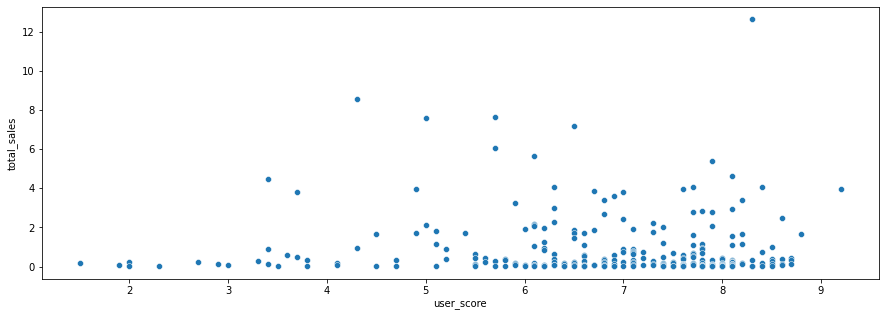

In [26]:
plt.figure(figsize=(15,5))
sns.scatterplot(
    x='user_score', 
    y='total_sales', 
    data=ps4_platform
);

#Зависимость отсутствует(-0.03)

In [27]:
ps4_platform = data[data['platform'] == 'PS4']
#Выбираем самую популярную платформу
ps4_platform['critic_score'].corr(ps4_platform['total_sales'])
#Считаем корреляцию между отзывами критиков и продажами

0.40656790206178095

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

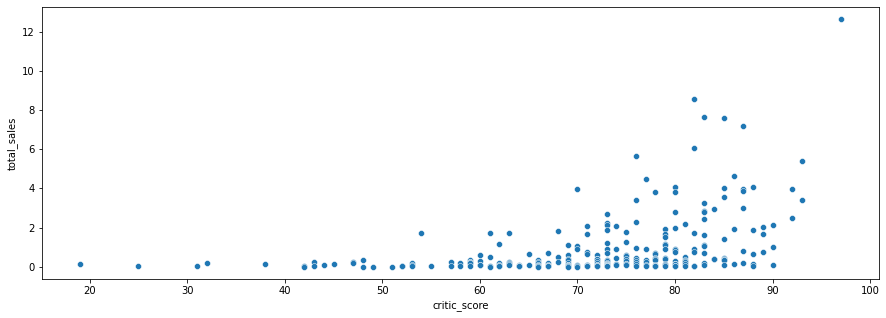

In [28]:
#Зависимость между отзывами критиков и продажами слабая(корреляция 0.4)

plt.figure(figsize=(15,5))
sns.scatterplot(
    data=ps4_platform,
    x='critic_score',
    y='total_sales'
)

In [29]:
ps4_platform[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='RdYlGn')

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [30]:
#xone_platform = data[data['platform'] == 'XOne']
#xone_platform_corr = xone_platform['user_score'].corr(xone_platform['total_sales'])
#print(f'Корреляцию между отзывами пользователей и продажами игр для XOne: {xone_platform_corr}')

#xone_platform = data[data['platform'] == 'XOne']
#xone_platform_corr = xone_platform['critic_score'].corr(xone_platform['total_sales'])
#print(f'Корреляцию между отзывами критиков и продажами игр для XOne: {xone_platform_corr}')

#xone_platform[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='RdYlGn')

In [31]:
#w_platform = data[data['platform'] == 'WiiU']
#w_platform_corr = w_platform['user_score'].corr(w_platform['total_sales'])
#print(f'Корреляцию между отзывами пользователей и продажами игр для WiiU: {w_platform_corr}')

#w_platform = data[data['platform'] == 'WiiU']
#w_platform_corr = w_platform['critic_score'].corr(w_platform['total_sales'])
#print(f'Корреляцию между отзывами критиков и продажами игр для WiiU: {w_platform_corr}')

#w_platform[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='RdYlGn')

In [32]:
#ds_platform = data[data['platform'] == '3DS']
#ds_platform_corr = ds_platform['user_score'].corr(ds_platform['total_sales'])
#print(f'Корреляцию между отзывами пользователей и продажами игр для 3DS: {ds_platform_corr}')

#ds_platform = data[data['platform'] == '3DS']
#ds_platform_corr = ds_platform['critic_score'].corr(ds_platform['total_sales'])
#print(f'Корреляцию между отзывами критиков и продажами игр для 3DS: {ds_platform_corr}')

#ds_platform[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='RdYlGn')

In [33]:
#pc_platform = data[data['platform'] == 'PC']
#pc_platform_corr = pc_platform['user_score'].corr(pc_platform['total_sales'])
#print(f'Корреляцию между отзывами пользователей и продажами игр для PC: {pc_platform_corr}')

#pc_platform = data[data['platform'] == 'PC']
#pc_platform_corr = pc_platform['critic_score'].corr(pc_platform['total_sales'])
#print(f'Корреляцию между отзывами критиков и продажами игр для PC: {pc_platform_corr}')

#pc_platform[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='RdYlGn')

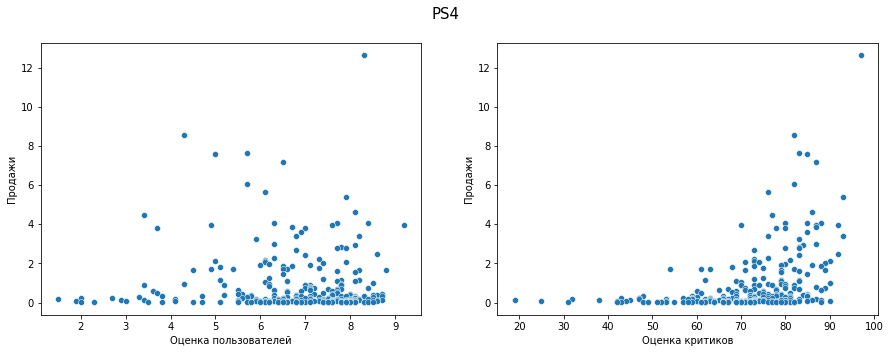

Корреляцию между отзывами критиков и продажами игр для PS4 : -0.031957110204556376
Корреляцию между отзывами критиков и продажами игр для PS4 : 0.40656790206178095


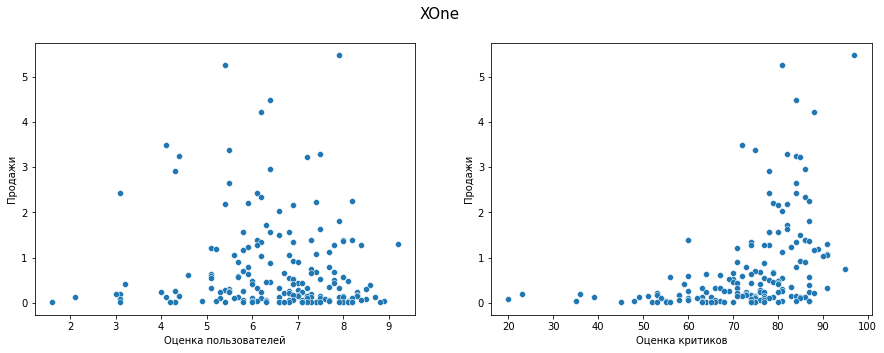

Корреляцию между отзывами критиков и продажами игр для XOne : -0.06892505328279414
Корреляцию между отзывами критиков и продажами игр для XOne : 0.4169983280084017


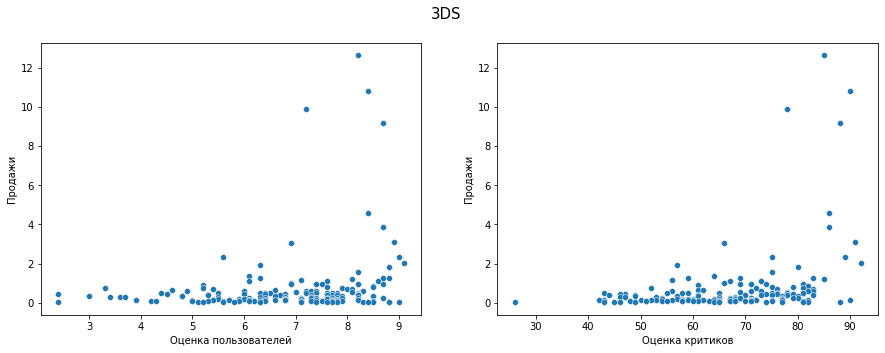

Корреляцию между отзывами критиков и продажами игр для 3DS : 0.22207843643390882
Корреляцию между отзывами критиков и продажами игр для 3DS : 0.3487397305984834


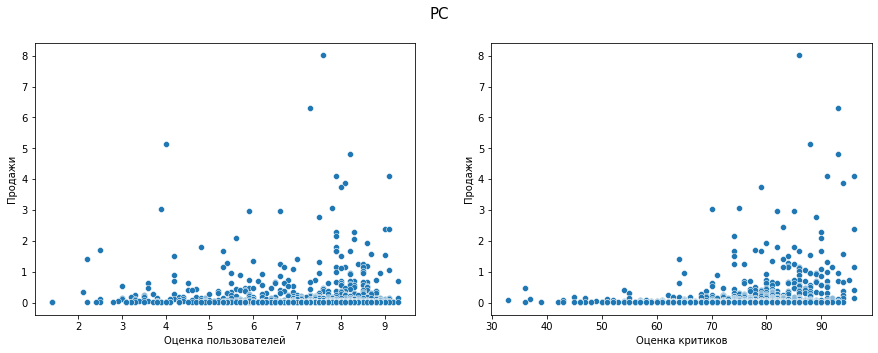

Корреляцию между отзывами критиков и продажами игр для PC : 0.012904741611451175
Корреляцию между отзывами критиков и продажами игр для PC : 0.257394718400985


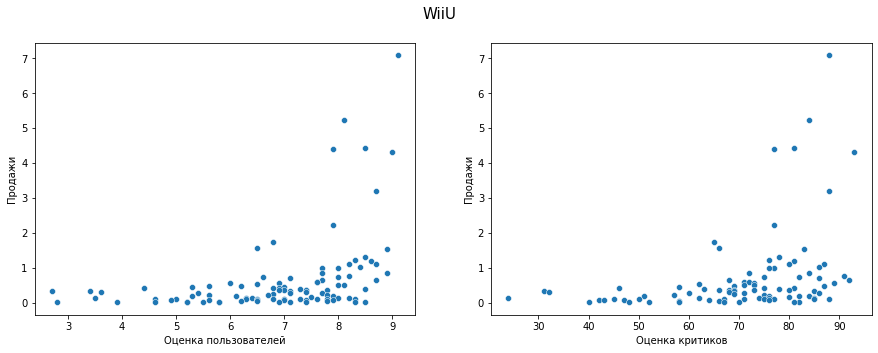

Корреляцию между отзывами критиков и продажами игр для WiiU : 0.4002190202148617
Корреляцию между отзывами критиков и продажами игр для WiiU : 0.34837976012017485


In [34]:
#функция для построения диаграмм рассеяния и расчета корреляции
def platform_graphic(all_platform):
    platform = data[data['platform']==all_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(all_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Продажи')
    ax[1].set(ylabel='Продажи')
    plt.show();
    
    user_cor = platform['user_score'].corr(platform['total_sales'])
    critic_cor = platform['critic_score'].corr(platform['total_sales'])
    
    print('Корреляцию между отзывами критиков и продажами игр для', all_platform, ':', user_cor)
    print('Корреляцию между отзывами критиков и продажами игр для', all_platform, ':', critic_cor)

for platform in top_platform_uniq:
    platform_graphic(platform)

Зависимость между отзывами пользователей и продажами отсутвует в продажах игр на платформах: PS4 и XOne, у PC зависимость стремится к 0.\
У WiiU и 3DS напротив, существует зависимость продаж от наличия отзывов пользователей 0.4 и 0.2 соответственно. Скорее всего это связано с тем, что это нишевые платформы. На них нет такого количества вышедших игр, как у лидеров рынка, поэтому каждая оценка влияет на общую выборку.\
Зависимость между отзывами критиков и продажами примерно у всех одинаковая, умеренная корреляция в пределах 0.3-0.4.\
Кроме того, присутствуют выбросы, игры у которых высокие оценки пользователей и критиков, но минимальные продажи.

<font color='Black'>Шкала для оценки корреляции:</font>
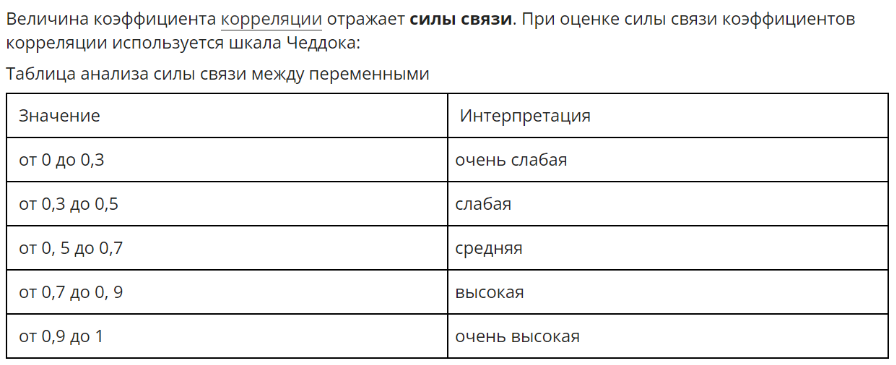

In [35]:
top_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,189.46
Shooter,164.27
Role-Playing,113.71
Sports,88.59
Platform,33.75
Misc,30.81
Racing,30.26
Fighting,25.50
Simulation,19.76


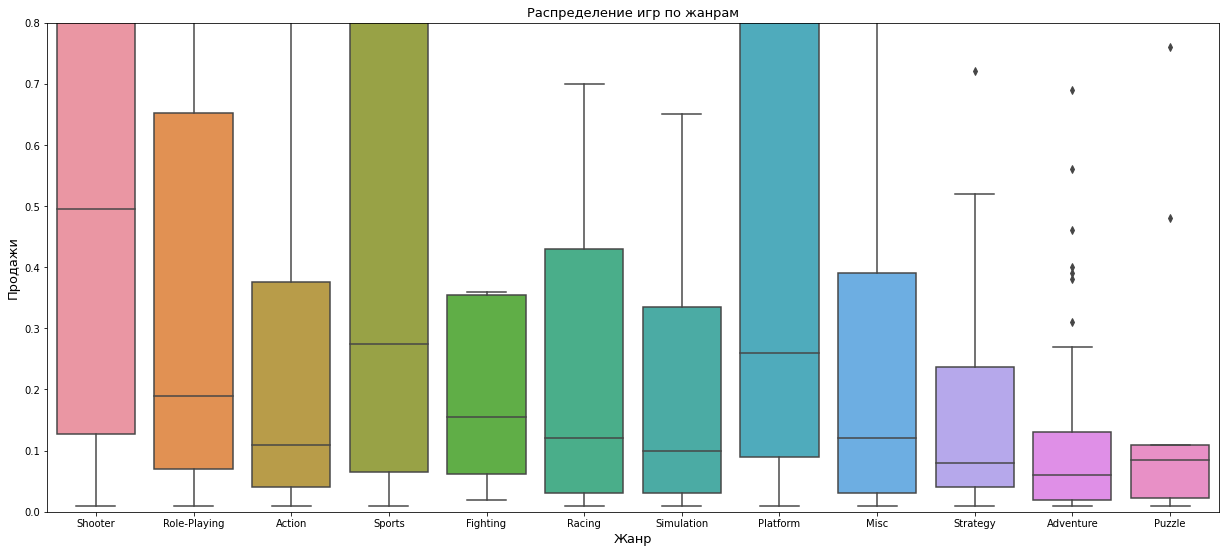

In [36]:
#диаграмма размаха по всем платформам за актуальный период
plt.figure(figsize=(21,9))
sns.boxplot(data=top_platform, x='genre', y='total_sales')
plt.title('Распределение игр по жанрам', fontsize=13)
plt.xlabel('Жанр', fontsize=13)
plt.ylabel('Продажи',fontsize=13)
plt.ylim([0, 0.8]);

In [37]:
#top_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
    #.sort_values(by='total_sales', ascending=False)\
    #.plot(kind="bar", figsize=(18,6))

#plt.title('Распределение игр по жанрам')
#plt.xlabel('Жанр')
#plt.ylabel('Продажи')
#plt.legend('')

Диаграммами размаха проиллюстрировала, что при сравнении медианных продаж, самым прибыльным жанром, не зависимо от платформы, является "Shooter".\
Следом за ним располагается жанр "Sports"(с очень популярной серией игр "FIFA"),с мединным значением около 0.3.\
Третье место занимают "Platform" с близким значением к предыдущему жанру, у которых так же не мало фанатов.\
Самыми нишевымии являются такие жанры как "Puzzle", "Strategy" и "Adventure", у которых обьемы продаж на порядок ниже самых популярных жанров, изначально рассчитаны на более низкую аудиторию. 

### Портрет пользователя каждого региона

In [38]:
#Создаем функцию для построения графиков "Самые популярные платформы (топ-5)".
def regions(groupby, region_sales, ax):
    pivot = top_platform.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'}
    plot = pivot.plot(kind='bar', title=title_dict[region_sales], ax=axes[ax], fontsize=10, rot=0)
    plot.set_xlabel('')
    plot.legend('')
    plot.title.set_size(20)

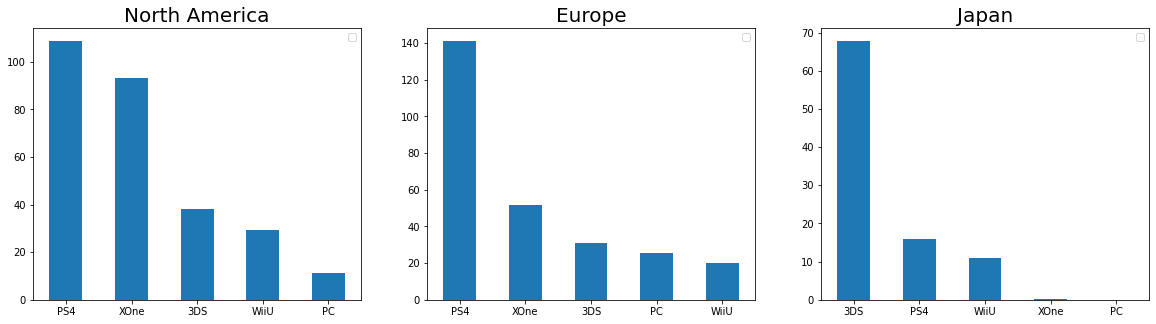

In [39]:
#Строим графики "Самые популярные платформы (топ-5)".
fig, axes = plt.subplots(1, 3, figsize=(20,5))
regions('platform', 'na_sales', 0)
regions('platform', 'eu_sales', 1)
regions('platform', 'jp_sales', 2)

Для пользователей Северной Америки самыми популярными платформами являются X360, PS2 и Wii.\
В Европе популярные платформы: PS2, PS3, X360.\
Пользователи из Японии больше всего предпочитают DS, PS, PS2

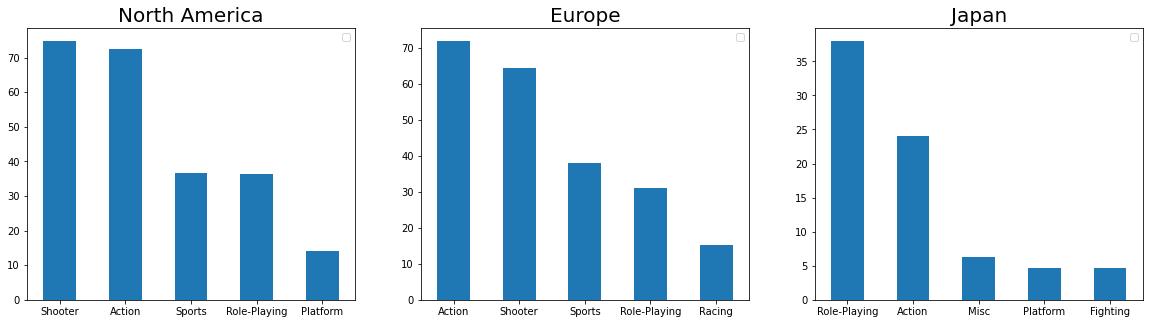

In [40]:
#Строим графики "Самые популярные жанры (топ-5)".
fig, axes = plt.subplots(1, 3, figsize=(20,5))
regions('genre', 'na_sales', 0)
regions('genre', 'eu_sales', 1)
regions('genre', 'jp_sales', 2)

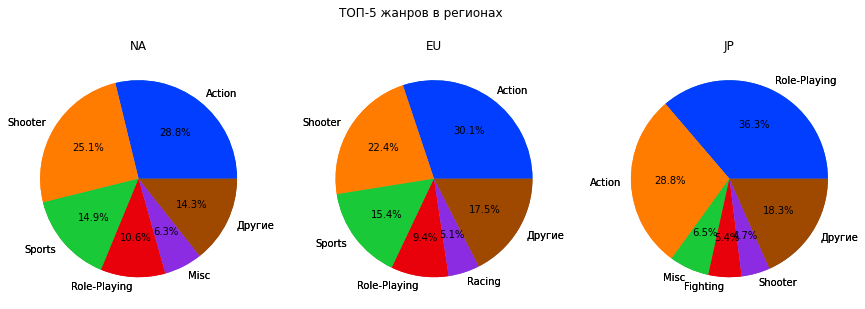

In [41]:
#Круговая диаграмма по жанрам для каждого региона
all_str = curr_period.columns[4:7]
colors = sns.color_palette('bright')[0:6]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
    genre_i = (curr_period.groupby('genre')[all_str[i]].sum().reset_index()\
             .sort_values(all_str[i], ascending = False, ignore_index = True).head(5))
    genre_i = genre_i.append({'genre': 'Другие', all_str[i]: curr_period[all_str[i]]\
                            .sum() - genre_i[all_str[i]].sum()}, ignore_index= True)
    axs[i].pie(genre_i[all_str[i]], labels = genre_i['genre'])
    axs[i].pie(genre_i[all_str[i]], labels = genre_i['genre'], colors = colors, autopct='%1.1f%%')
    axs[i].set_title(genre_i.columns[1].split('_')[0].upper())
plt.show() 

Самые популярные жанры в Северной Америке и Европе: 'Action' и 'Shooter'. Это основной рынок сбыта для данных жанров.
Популярность подобных жанров можно обьяснить тем, что они помогают расслабиться после тяжелого трудового дня, в этом смысле они определённо полезны, ведь игрок может выплеснуть накопившуюся в нём агрессию от стрессов реального мира (что более присуще западным странам) в мире виртуальном.\
В Японии самый популярный жанр 'Role-Playing'. В азиатских странах последнее десятелетее преобладает подобный жанр, все больше игроков предпочитают фэнтезийные RPG, в том числе MMO. Западные производители с каждым годом теряют свою позиции в подобном жанре, потому что спрос на них не такой большой как на востоке. Спрос геймеров азиатских стран, подталкивает производителей сосредоточить производство игр в сторону RPG.

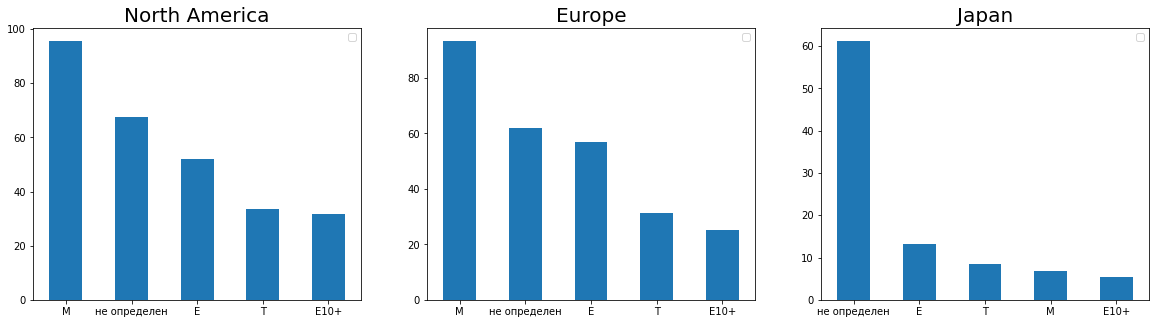

In [42]:
#Строим графики "Влияние рейтинга ESRB на продажи в отдельном регионе"
fig, axes = plt.subplots(1, 3, figsize=(20,5))
regions('rating', 'na_sales', 0)
regions('rating', 'eu_sales', 1)
regions('rating', 'jp_sales', 2)

Рейтинг ESRB:\
EC: Для детей младшего возраста\
E: Для всех\
E10+: Для всех старше 10 лет\
T: Подросткам 13—19 лет\
M: От 17 лет\
AO: Только для взрослых\
RP: Рейтинг ожидается

В Северной Америке и Европе ситуация практически идентичная. Самые продаваемые игры с рейтингом 'От 17 лет'.\
Рейтинг практически не влияет на продажи.\
Рейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии.\
Такой большой показатель не определенного жанра в Японии может говорить о том, что в данной выборке был учтен только рейтинг ESRB, без учета местных рейтингов PEGI и CERO. Скорее всего это игры в жанре RPG для местного рынка.

### Проверка гипотезы

In [43]:
xone = top_platform.loc[top_platform['platform'] == 'XOne']['user_score'].dropna()
pc = top_platform.loc[top_platform['platform'] == 'PC']['user_score'].dropna()
#Создаем выборки по платформам XOne и PC, а также удаляем строки NaN для корректного подсчета

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [44]:
#Проверка гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
results = st.ttest_ind(xone, pc, equal_var=False)

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Xbox One и PC(которая в большинстве своем имеет операционную систему Windows), принадлежат одному производителю Microsoft.\
Игры этого производителя, за исключением эксклюзивов, выходят на двух платформах и имеют одинаковые оценки.\
Поскольку наша нулевая гипотеза касается того, что широко признано истинным, тогда должна быть высокая степень доказательств в пользу отклонения нулевой гипотезы. Это обеспечивается pvalue, которое намного меньше, чем обычно используемые значения для alpha.

In [45]:
action = top_platform.loc[top_platform['genre'] == 'Action']['user_score'].dropna()
sports = top_platform.loc[top_platform['genre'] == 'Sports']['user_score'].dropna()

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.\
Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [46]:
results = st.ttest_ind(action, sports, equal_var=False)

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports одинаковые.')

6.954390687344237e-11
Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports различаются.


Нулевая гипотеза – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий, отсутствие влияние фактора, отсутствие эффекта, равенство нулю значений выборочных характеристик и т.п. - H0\
Другое проверяемое предположение (не всегда строго противоположное или обратное первому) называется альтернативной гипотезой - Н1. Выдвинутая гипотеза может быть правильной или неправильной, поэтому возникает необходимость проверить ее.

Поскольку данные имеют нормальное распределение, то для определения статистической значимости различий средних величин был применен двусторонний t-тест Стьюдента. 

Первая нулевая гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
pvalue = 0.14759594013430463\
Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Вторая нулевая гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports одинаковые.\
pvalue = 6.954390687344237e-11\
Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports различаются.




### Общий вывод

При проведении исследования и работы с данными, была изучена информация из открытых источников - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Выполнена предобработка данных. В том числе удаление пропусков, заполненение пропущенных и аномальных значений, изменение типов данных, исправление опечаток, посчитаны и добавлены новые значения в таблицу.
Проведен исследовательский анализ данных. Найдены интересные особенности и зависимости, которые существовали на игровом рынке. При проведении исследования данных, я использовал различные методы, в том чиле сводные таблицы, группировку данных, а так же визуализировал данные. На основании проанализированной информации, мной были изучены основные данные о развитии в игровой индустрии до 2016 года.

Так же я выявил:

- Сколько игр выпускалось в разные годы.
- Как менялись продажи по платформам.
- Какие платформы лидировали по продажам, а так же росли и падали.
- Общее распределение игр по жанрам.
- Портрет пользователя каждого региона.

С 2000-го года начинается активный рост выпуска компьютерных игр.\
На период 2006-2011гг. приходится максимальное количество выпущенных игр. Связано это с развитием цифровых технологий, доступностью персональных компьютеров и приставок, а так же спросом на появление соответствующего контента.
Пик приходится на 2009г. После этого идет резкое снижение до 2013г.
Период с 1980г. по 1994г. является стабильным и в тоже время наименьшим по производительности.

В среднем, активное использование игровых платформ 6-9 лет. Наибольшее число продаж выпадает на 2006-2010гг.\
Снижение продаж всех игровых платформ, в основном, происходит из-за устаревания платформы и выхода новых поколений.\
Основные лидеры и главные конкуренты PS и Xbox.\
Аутсайдерами являются PC и портативные устройства 3DS в связи с тем, что они меньше всего предназначены для комфортного гейминга. Кроме того, на показатели PC может влиять низкая стоимость игр в период распродаж в онлайн-сервисах цифрового распространения компьютерных игр (Steam), а так же наличие торрент трекеров, что уменьшает количество глобальных продаж игр у PC.

Зависимость между рейтингом и продажами – прямая. Чем лучше рейтинг, тем больше ей доверяют потенциальные клиенты, тем выше её прибыль.\
В данном случае зависимость между отзывами пользователей и продажами отсутвует на платформах: PS4 и XOne, у PC зависимость стремится к 0.\
У WiiU и 3DS напротив, существует зависимость продаж от наличия отзывов пользователей. Скорее всего это связано с тем, что это нишевые платформы. На них нет такого количества вышедших игр, как у лидеров рынка. И каждая оценка влияет на общую выборку.\
Зависимость между отзывами критиков и продажами примерно у всех одинаковая - умеренная зависимость.\

Самый прибыльный жанр - Shooter. Является лидером всех компьютерных игр, который рассчитан на широкую аудиторию.\
Следом за ним располагаются жанры: Action, у которого так же не мало поклонников. На третьем и четвертом месте Role-Playing (серия игр Diablo и Ведьмак) и Sports (серия игр FIFA) у которых так же не мало фанатов.\

Для пользователей Северной Америки самыми популярными платформами являются X360, PS2 и Wii.\
В Европе популярные платформы: PS2, PS3, X360.\
Пользователи из Японии больше всего предпочитают DS, PS, PS2.

Самые популярные жанры в Северной Америке и Европе: 'Shooter' и 'Action'.\
В Японии самый популярный жанр 'Role-Playing'. В азиатских странах последнее десятелетее преобладает подобный жанр, все больше игроков предпочитают фэнтезийные RPG, в том числе MMO.

Самые продаваемые игры в Северной Америке и Европе имеют рейтинг 'От 17 лет'.\
В Японии преобладают RPG игры для местного рынка.\
Рейтинг практически не влияет на продажи.

Кроме того, не удалось отвергнуть первую нулевую гипотезу, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Но удалось подтвердить вторую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports различаются.

На основании анализа можно сделать рекомендации на какой продукт сделать ставку и как спланировать рекламные кампании.

Для рекламных компаний в Северной Америки и Европы:
- Наиболее перспективные игровые платформы является: PS4 и XOne.
- Самые популярные жанры игр: Shooter и Action.
- Популярный рейтинг ESRB: 'M' От 17 лет.

Для рекламных компаний в Японии:
- Наиболее перспективная игровая платформа: 3DS
- Самый популярный жанр: Role_playing